In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
house = pd.read_csv("data/house.csv", index_col = 0)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
house.shape

(1460, 80)

In [28]:
house.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [29]:
house.MSSubClass = house.MSSubClass.astype(str)
house.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [30]:
house.isnull().sum().sum()

7829

In [31]:
house.dropna().shape

(0, 80)

In [32]:
miss_percent = house.isnull().mean()
miss_percent

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [33]:
drop_cols = list(miss_percent[miss_percent > 0.1].index)
drop_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [34]:
df_drop_cols = house.drop(drop_cols, axis = 1)
df_drop_cols.shape

(1460, 73)

In [35]:
df_drop_cols.isnull().sum().sum()

601

In [36]:
df_without_na = df_drop_cols.dropna()
df_without_na.shape

(1338, 73)

In [37]:
df_without_na_dummy = pd.get_dummies(df_without_na, drop_first=True, dtype="int")
df_without_na_dummy.shape

(1338, 237)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

X = df_without_na_dummy.drop("SalePrice", axis = 1)
y = df_without_na_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv=10)

results = pd.DataFrame([], columns = ["r2_mean", "r2_std", "r2_test"])
results.loc["Without NA"] = [scores.mean(), scores.std(), r2]
results

,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218


In [39]:
miss_percent = df_drop_cols.isnull().mean()
miss_percent[miss_percent > 0]

MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [40]:
df_drop_cols.MasVnrArea = df_drop_cols.MasVnrArea.fillna(0)
df_drop_cols.BsmtQual = df_drop_cols.BsmtQual.fillna("None")
df_drop_cols.BsmtCond = df_drop_cols.BsmtCond.fillna("None")
df_drop_cols.BsmtExposure = df_drop_cols.BsmtExposure.fillna("None")
df_drop_cols.BsmtFinType1 = df_drop_cols.BsmtFinType1.fillna("None")
df_drop_cols.BsmtFinType2 = df_drop_cols.BsmtFinType2.fillna("None")
df_drop_cols.Electrical = df_drop_cols.Electrical.fillna("None")
df_drop_cols.GarageType = df_drop_cols.GarageType.fillna("None")
df_drop_cols.GarageYrBlt = df_drop_cols.GarageYrBlt.fillna(0)
df_drop_cols.GarageFinish = df_drop_cols.GarageFinish.fillna("None")
df_drop_cols.GarageQual = df_drop_cols.GarageQual.fillna("None")
df_drop_cols.GarageCond = df_drop_cols.GarageCond.fillna("None")
df_drop_cols.shape

(1460, 73)

In [41]:
df_drop_cols_dummy = pd.get_dummies(df_drop_cols, drop_first=True, dtype="int")
print(df_drop_cols_dummy.shape)

X = df_drop_cols_dummy.drop("SalePrice", axis = 1)
y = df_drop_cols_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv=10)

results.loc["Fill NA"] = [scores.mean(), scores.std(), r2]
results

(1460, 252)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582


In [42]:
df_drop_cols["LotFrontage"] = house.LotFrontage.fillna(0)
df_drop_cols["Alley"] = house.Alley.fillna("None")
df_drop_cols["FireplaceQu"] = house.FireplaceQu.fillna("None")
df_drop_cols["PoolQC"] = house.PoolQC.fillna("None")
df_drop_cols["Fence"] = house.Fence.fillna("None")
df_drop_cols["MiscFeature"] = house.MiscFeature.fillna("None")
df_drop_cols["MasVnrType"] = house.MasVnrType.fillna("None")
print(df_drop_cols.shape)

(1460, 80)


In [43]:
df_drop_cols_dummy = pd.get_dummies(df_drop_cols, drop_first=True, dtype="int")
print(df_drop_cols_dummy.shape)

X = df_drop_cols_dummy.drop("SalePrice", axis = 1)
y = df_drop_cols_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv=10)

results.loc["Full Data"] = [scores.mean(), scores.std(), r2]
results

(1460, 274)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897


In [44]:
df_new = df_drop_cols.copy()
category_percent = df_new.MSSubClass.value_counts() / len(df_new)

In [45]:
category = list(category_percent[category_percent < 0.01].index)
df_new.MSSubClass = df_new.MSSubClass.replace(category, "Other")
df_new.MSSubClass.value_counts() / len(df_new)

MSSubClass
20       0.367123
60       0.204795
50       0.098630
120      0.059589
30       0.047260
160      0.043151
70       0.041096
80       0.039726
90       0.035616
190      0.020548
Other    0.017808
85       0.013699
75       0.010959
Name: count, dtype: float64

In [46]:
df_new_dummy = pd.get_dummies(df_new, drop_first=True, dtype="int")
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv=10)

results.loc["MSSubclass Simple"] = [scores.mean(), scores.std(), r2]
results

(1460, 272)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499


In [47]:
cat_cols = [col for col in df_new.columns if df_new[col].dtype == "object"]
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'Alley',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MasVnrType']

In [48]:
def merge_category(x):
  category_percent = x.value_counts() / len(x)
  category = list(category_percent[category_percent < 0.01].index)
  if len(category) >= 2:
    return x.replace(category, "Other")
  else:
    return x

df_new[cat_cols] = df_new[cat_cols].apply(merge_category)

In [49]:
df_new_dummy = pd.get_dummies(df_new, drop_first=True, dtype="int")
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv=10)

results.loc["All Category Simple"] = [scores.mean(), scores.std(), r2]
results

(1460, 217)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965


In [50]:
df_new.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [51]:
df_new.ExterQual = df_new.ExterQual.replace({"Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
df_new.ExterQual.unique()

array([3, 2, 4, 1])

In [52]:
df_new_dummy = pd.get_dummies(df_new, drop_first=True, dtype="int")
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train, y_train, cv=10)

results.loc["ExterQual Ordinal"] = [scores.mean(), scores.std(), r2]
results

(1460, 215)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884


In [53]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.01)
selector.fit(X_train)

X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv=10)

results.loc["Variance Threshold"] = [scores.mean(), scores.std(), r2]
results

(1168, 196)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697


In [54]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k="all")
selector.fit(X_train, y_train)

f_scores = pd.Series(selector.scores_, index = X_train.columns)
f_scores = f_scores.sort_values(ascending=False)
f_scores

OverallQual             1879.151818
GrLivArea               1093.390361
ExterQual                927.122414
GarageCars               813.186816
GarageArea               744.064301
                           ...     
Condition2_Other           0.047660
BsmtFinSF2                 0.038298
RoofStyle_Other            0.010914
Neighborhood_SawyerW       0.007409
Foundation_Other           0.000051
Length: 214, dtype: float64

In [55]:
k = 108

best_cols = f_scores[:k].index

X_train_new = X_train[best_cols]
X_test_new = X_test[best_cols]
print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv=10)

results.loc["Seleck Kbest"] = [scores.mean(), scores.std(), r2]
results

(1168, 108)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Seleck Kbest,0.812241,0.119639,0.871132


In [56]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
  best_cols = f_scores[:k].index
  X_train_new = X_train[best_cols]
  scores = cross_val_score(mdl, X_train_new, y_train, cv=10)
  if scores.mean() > best_r2:
    best_r2 = scores.mean()
    best_k = k

print(best_k)

108


In [57]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor


selector = RFE(DecisionTreeRegressor(random_state = 42), n_features_to_select=1)
selector.fit(X_train, y_train)

ranks = pd.Series(selector.ranking_, index = X_train.columns)
ranks = ranks.sort_values()
ranks

OverallQual              1
GrLivArea                2
TotalBsmtSF              3
YearBuilt                4
LotArea                  5
                      ... 
Exterior1st_CemntBd    210
HouseStyle_SFoyer      211
GarageCond_None        212
Condition1_PosN        213
LotShape_IR3           214
Length: 214, dtype: int64

In [58]:
k = 87

best_cols = ranks[:k].index

X_train_new = X_train[best_cols]
X_test_new = X_test[best_cols]
print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv=10)

results.loc["RFE"] = [scores.mean(), scores.std(), r2]
results

(1168, 87)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Seleck Kbest,0.812241,0.119639,0.871132
RFE,0.804137,0.129364,0.859627


In [59]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
  best_cols = ranks[:k].index
  X_train_new = X_train[best_cols]
  scores = cross_val_score(mdl, X_train_new, y_train, cv=10)
  if scores.mean() > best_r2:
    best_r2 = scores.mean()
    best_k = k

print(best_k)

87


In [60]:
dt_mdl = DecisionTreeRegressor(random_state = 42)
dt_mdl.fit(X_train, y_train)

importances = dt_mdl.feature_importances_
importances = pd.Series(importances, index = X_train.columns)
importances = importances.sort_values(ascending=False)
importances

OverallQual            0.634357
GrLivArea              0.105921
TotalBsmtSF            0.031588
2ndFlrSF               0.029569
1stFlrSF               0.017808
                         ...   
GarageType_Other       0.000000
GarageFinish_None      0.000000
MSSubClass_80          0.000000
Exterior1st_WdShing    0.000000
MSSubClass_85          0.000000
Length: 214, dtype: float64

In [61]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
  best_cols = importances[:k].index
  X_train_new = X_train[best_cols]
  scores = cross_val_score(mdl, X_train_new, y_train, cv=10)
  if scores.mean() > best_r2:
    best_r2 = scores.mean()
    best_k = k

print(best_k)

116


In [62]:
k = 116

best_cols = importances[:k].index

X_train_new = X_train[best_cols]
X_test_new = X_test[best_cols]
print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv=10)

results.loc["Select From Model"] = [scores.mean(), scores.std(), r2]
results

(1168, 116)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Seleck Kbest,0.812241,0.119639,0.871132
RFE,0.804137,0.129364,0.859627
Select From Model,0.812435,0.132485,0.859646


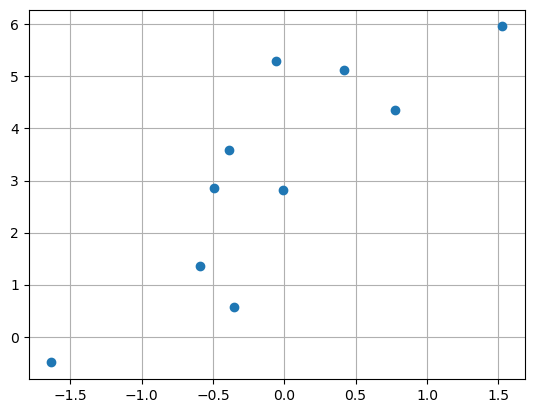

In [63]:
x1 = np.random.normal(0, 1, 10)
x2 = 2 * x1 + 3 + np.random.normal(0, 1, 10)

plt.plot(x1, x2, "o")
plt.grid()

(-3.5428180056362137,
 4.3032054110226206,
 -0.6531444295555142,
 7.19287898710332)

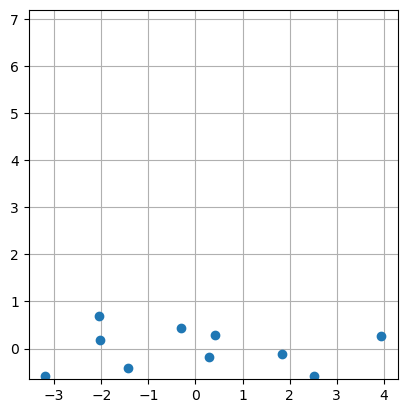

In [64]:
from sklearn.decomposition import PCA

pca = PCA()
X_temp = np.c_[x1,x2]
X_temp = pca.fit_transform(X_temp)
plt.plot(X_temp[:,0], X_temp[:,1], "o")
plt.grid()
plt.axis("square")


In [65]:
pca = PCA(n_components=4)
pca.fit(X_train)

X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

print(X_train_new.shape)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2 = r2_score(y_test, y_pred)

scores = cross_val_score(mdl, X_train_new, y_train, cv=10)

results.loc["PCA"] = [scores.mean(), scores.std(), r2]
results

(1168, 4)


,r2_mean,r2_std,r2_test
Without NA,0.548538,0.568624,0.373218
Fill NA,0.591975,0.416633,0.642582
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Seleck Kbest,0.812241,0.119639,0.871132
RFE,0.804137,0.129364,0.859627
Select From Model,0.812435,0.132485,0.859646


In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)
X_train_new

array([[0.0331861 , 0.44444444, 0.625     , ..., 0.        , 1.        ,
        0.        ],
       [0.03055458, 0.55555556, 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.03494823, 0.44444444, 0.75      , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.0321204 , 0.44444444, 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.02964313, 0.66666667, 0.875     , ..., 0.        , 1.        ,
        0.        ],
       [0.01114305, 0.66666667, 0.5       , ..., 1.        , 0.        ,
        0.        ]])

In [67]:
X = df_new.drop("SalePrice", axis = 1)
y = df_new.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(pd.get_dummies(X_train, drop_first=True, dtype="int").shape)
print(pd.get_dummies(X_test, drop_first=True, dtype="int").shape)

(1168, 214)
(292, 210)


In [68]:
cat_cols = [col for col in df_new.columns if df_new[col].dtype == "object"]
num_cols = [col for col in df_new.columns if col not in cat_cols]

In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop = "first")
encoder.fit(X_train[cat_cols])
encoder.transform(X_train[cat_cols]).shape
encoder.transform(X_test[cat_cols])

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [70]:
X = house.drop("SalePrice", axis = 1)
y = house.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

cat_cols = [col for col in X.columns if X[col].dtype == "object"]
num_cols = [col for col in X.columns if col not in cat_cols]

In [71]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

imputer.fit(X_train[num_cols])
imputer.transform(X_train[num_cols])


imputer = SimpleImputer(strategy = "most_frequent")

imputer.fit(X_train[cat_cols])
imputer.transform(X_train[cat_cols])

array([['20', 'RL', 'Pave', ..., 'Shed', 'WD', 'Normal'],
       ['60', 'RL', 'Pave', ..., 'Shed', 'WD', 'Normal'],
       ['30', 'RL', 'Pave', ..., 'Shed', 'WD', 'Normal'],
       ...,
       ['20', 'RL', 'Pave', ..., 'Shed', 'WD', 'Normal'],
       ['50', 'RL', 'Pave', ..., 'Shed', 'WD', 'Normal'],
       ['120', 'RL', 'Pave', ..., 'Shed', 'WD', 'Normal']], dtype=object)

In [72]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_train[num_cols])
imputer.transform(X_train[num_cols])

array([[7.000e+01, 8.400e+03, 5.000e+00, ..., 0.000e+00, 6.000e+00,
        2.010e+03],
       [5.900e+01, 7.837e+03, 6.000e+00, ..., 0.000e+00, 5.000e+00,
        2.009e+03],
       [6.700e+01, 8.777e+03, 5.000e+00, ..., 0.000e+00, 5.000e+00,
        2.008e+03],
       ...,
       [6.000e+01, 8.172e+03, 5.000e+00, ..., 0.000e+00, 4.000e+00,
        2.006e+03],
       [5.500e+01, 7.642e+03, 7.000e+00, ..., 0.000e+00, 6.000e+00,
        2.007e+03],
       [5.300e+01, 3.684e+03, 7.000e+00, ..., 0.000e+00, 6.000e+00,
        2.009e+03]])

In [73]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.preprocessing._encoders')

X = house.drop("SalePrice", axis = 1)
y = house.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

cat_cols = [col for col in X.columns if X[col].dtype == "object"]
num_cols = [col for col in X.columns if col not in cat_cols]

imputer_cat = SimpleImputer(strategy = "most_frequent")
imputer_num = SimpleImputer(strategy = "median")

imputer_cat.fit(X_train[cat_cols])
imputer_num.fit(X_train[num_cols])

X_train_cat = imputer_cat.transform(X_train[cat_cols])
X_train_num = imputer_num.transform(X_train[num_cols])

X_test_cat = imputer_cat.transform(X_test[cat_cols])
X_test_num = imputer_num.transform(X_test[num_cols])

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop = "first")
encoder.fit(X_train_cat)
X_train_cat = encoder.transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

X_train_new = np.c_[X_train_cat, X_train_num]
X_test_new = np.c_[X_test_cat, X_test_num]

selector = SelectKBest(f_regression, k=100)
selector.fit(X_train_new, y_train)

X_train_new = selector.transform(X_train_new)
X_test_new = selector.transform(X_test_new)

mdl = LinearRegression()
mdl.fit(X_train_new, y_train)
y_pred = mdl.predict(X_test_new)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8670392039874422


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocess_num = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])

preprocess_cat = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop = "first"))
])

preprocess = ColumnTransformer([
    ("preprocess_num", preprocess_num, num_cols),
    ("preprocess_cat", preprocess_cat, cat_cols)
])

ml_pipe = Pipeline([
    ("preprocess", preprocess),
    ("selector", SelectKBest(f_regression, k=100)),
    ("mdl", LinearRegression())
])

ml_pipe.fit(X_train, y_train)
y_pred = ml_pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8669547993126923


In [75]:
from sklearn.ensemble import RandomForestRegressor

preprocess_num = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])

preprocess_cat = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop = "first"))
])

preprocess = ColumnTransformer([
    ("preprocess_num", preprocess_num, num_cols),
    ("preprocess_cat", preprocess_cat, cat_cols)
])

ml_pipe = Pipeline([
    ("preprocess", preprocess),
    ("selector", SelectKBest(f_regression)),
    ("mdl", RandomForestRegressor())
])

ml_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('preprocess_num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'Bsmt...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir', ...])])),
                ('selector',
                 SelectKBest(score_func=<function f_regression at 0x14c6c27a0>)),
                ('mdl', RandomForestRegressor())])

In [76]:
import time
from sklearn.model_selection import GridSearchCV

param_grid = {"selector__k" : [50,75,100,125,150],
              "mdl__n_estimators" : [100,250,500],
              "mdl__max_depth" : [5,7,10,15]
}
start_time = time.time()

grid_search = GridSearchCV(ml_pipe, param_grid, cv=10, scoring="r2")
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
print(f"Elapsed time: {int(minutes)} min {int(seconds)} sec")

Best parameters: {'mdl__max_depth': 15, 'mdl__n_estimators': 100, 'selector__k': 125}
Best score: 0.8425068107629216
Elapsed time: 18 min 39 sec


In [77]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Skoru: {r2}")

R2 Skoru: 0.8856482993445525
